Let's load up our data and do a little feature engineering.

In [1]:
import pandas as pd

TSLA = '/kaggle/input/tesla-stock-price/Tesla_stock_price.csv'
df = pd.read_csv(filepath_or_buffer=TSLA, parse_dates=['Date'], date_format='dd-mm-yyyy')
df['date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['year'] = df['date'].dt.year
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,date,year
0,29-06-2010,1.592667,1.592667,1.666667,1.169333,1.266667,281494500,2010-06-29,2010
1,30-06-2010,1.588667,1.588667,2.028000,1.553333,1.719333,257806500,2010-06-30,2010
2,01-07-2010,1.464000,1.464000,1.728000,1.351333,1.666667,123282000,2010-07-01,2010
3,02-07-2010,1.280000,1.280000,1.540000,1.247333,1.533333,77097000,2010-07-02,2010
4,06-07-2010,1.074000,1.074000,1.333333,1.055333,1.333333,103003500,2010-07-06,2010


Next let's look at the price correlations to see if any of the price series we have are redundant.

In [2]:
df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()

,Adj Close,Close,High,Low,Open,Volume
Adj Close,1.000000,1.000000,0.999650,0.999689,0.999214,0.097115
Close,1.000000,1.000000,0.999650,0.999689,0.999214,0.097115
High,0.999650,0.999650,1.000000,0.999635,0.999719,0.099798
Low,0.999689,0.999689,0.999635,1.000000,0.999630,0.092812
Open,0.999214,0.999214,0.999719,0.999630,1.000000,0.096042
Volume,0.097115,0.097115,0.099798,0.092812,0.096042,1.000000


What do we see? We see two things:
1. The closing price and the adjusted closing price are perfectly correlated; this means there are no adjustments, and one of them is redundant.
2. The prices and volume are weakly positively correlated.

Let's take a look at the price time series. Because we have such a large difference between the prices at the start and end of the period of interest, we should probably graph the log of the price.

<Axes: xlabel='date', ylabel='Close'>

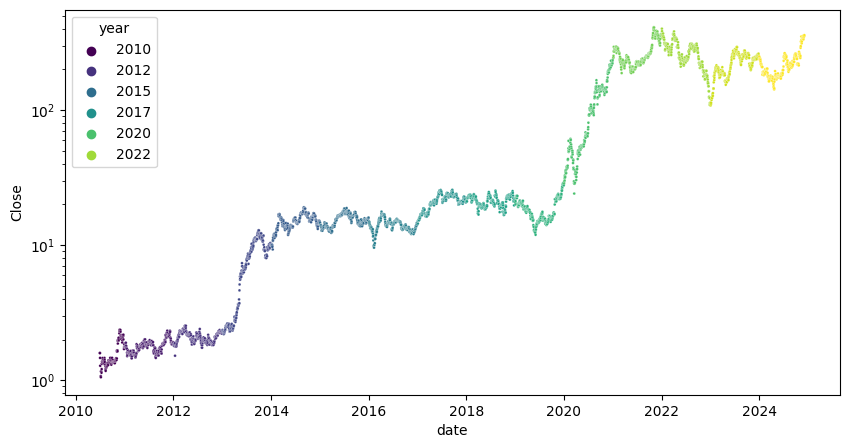

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (10, 5)
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(data=df, x='date', y='Close', s=4, hue='year', palette='viridis')

What do we see? We see three distinct phases where the price stays in a relatively narrow trading range, with two large run-ups punctuating each phase.

Let's have a look at the price/volume relationship. What do we expect, given what we know, to see relating the price and volume?

<Axes: xlabel='Close', ylabel='Volume'>

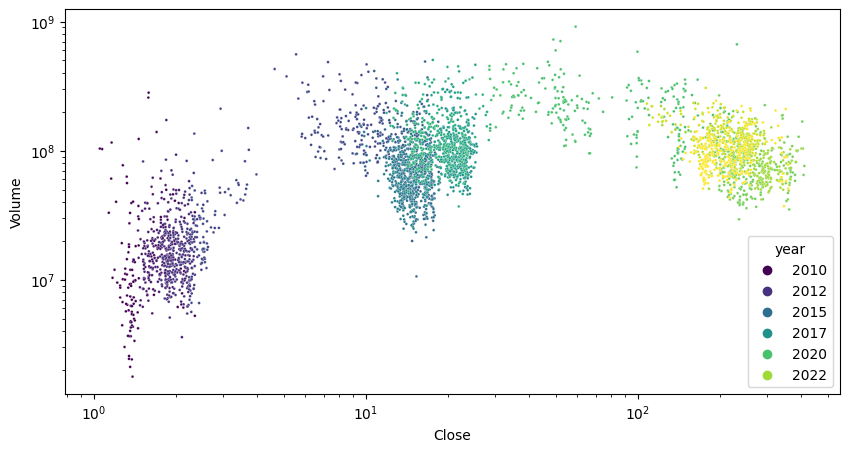

In [4]:
plt.figure(figsize=FIGSIZE)
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, x='Close', y='Volume', s=4, hue='year', palette='viridis')

Not surprisingly the price and volume seem essentially uncorrelated, What really stands out are the three price phases. If we squint maybe we can also see that when the stock was unfashionable and the price was low, prior to about 2014 or 2015, the volume was also low. This was clearly an unloved stock for a relatively long time.